# Bird species Classification using Machine Learning

In this project, bird species are classified using machine learning algorithms. There are many distinct kinds of birds, including raptors, terrestrial birds, wading birds, and swimming birds. They are divided into various ecological groupings based on their lifestyles and habitats. various ecological groups' bairds have various outward characteristics. Their skeletal systems are distinct. To categorise the different bird species in my research, I'll use machine learning algorithms like Random Forest and Support Vector Machines. A confusion matrix will be used to evaluate the outcomes. The most effective model will be chosen and used for inferencing. 

## The Dataset

This dataset contains 420 birds. Each bird is represeneted by 10 measurements which are the features of this dataset. The description is given below.

* id - Unique ID for each bird
* huml - Length of Humerus
* humw - Diameter of Humerus
* ulnal - Length of Ulna 
* ulnaw - Diameter of Ulna
* feml - Length of Femur
* femw - Diameter of Femur
* tibl - Length of Tibiotarsus
* tibw - Diameter of Tibiotarsus
* tarl - Length of Tarsometatarsus
* tarw - Diameter of Tarsometatarsus
* type - label for the ecological groups

These labels are described as below.

* SW: Swimming Birds
* W: Wading Birds
* T: Terrestrial Birds
* R: Raptors
* P: Scansorial Birds
* SO: Singing Birds

In [1]:
#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# read data from the csv file into a dataframe
bird_df = pd.read_csv('/home/msc1/Desktop/MLcoursework/bird.csv')
# make a copy of the original data
df = bird_df.copy()

# Exploratory Data Analysis

There are 420 birds in this dataset. Ten measurements, which make up the dataset's characteristics, are used to represent each bird. Following is a description.

In [4]:
# show top rows of the dataframe
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [5]:
# prints the list of columns present in the dataframe
df.columns

Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

This function outputs a summary of the dataframe's information. This dataframe has 12 columns and 420 rows. The columns' 10 float64, 1 int64, and 1 object type data types. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


The 'id' column will be removed because it has no bearing on the dataset or the results.

In [7]:
# drop id column
df = df.drop('id', 1)

The total count, mean value, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum values of each column are listed below.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00
tarw,419.0,2.930024,2.185673,0.66,1.4250,2.230,3.500,14.09


## Missing Data

The missing data are checked by this code. O denotes no missing data, 1 or more denotes the absence of data. Except for id and type, every column in the output shown below has a missing value.

In [9]:
# check for missing value for each column
df.isnull().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

To determine where the data is lacking, let's generate a heatmap. This will demonstrate how much information is missing from each column on average.

<AxesSubplot:>

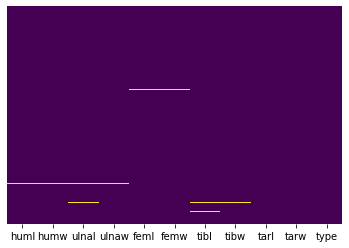

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is a missing data, hence the model's performance is unaffected. I'll use the median method to impute the missing numbers. The median value, which is the middle number in the dataset, is independent of all other values. Outliers have no impact on the median values.

In [11]:
# function to impute missing data using median method
def impute_data(df):
    for col in df:
        # if the column has missing values below code will execute
        if df[col].isnull().sum():
            print(col)
            # Replace using median 
            median = df[col].median()
            df[col].fillna(median, inplace=True)

In [12]:
impute_data(df)

huml
humw
ulnal
ulnaw
feml
femw
tibl
tibw
tarl
tarw


In [2]:
df.isnull().sum()

NameError: name 'df' is not defined

As you can see this data has been imputed and no missing data is shown in this data set

Lets create a plot to check this number of specimens in each ecological group

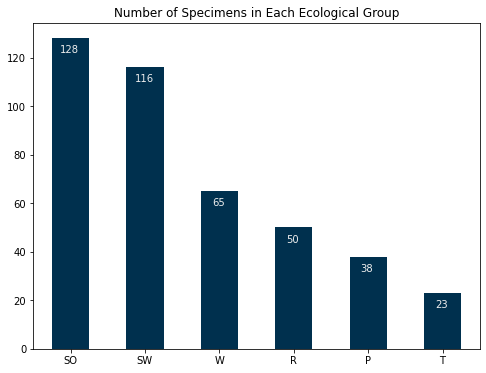

In [14]:
# group together the same classes and sort in ascending order 
size_of_each_group = df.groupby("type").size().sort_values(ascending=False)

ax = size_of_each_group.plot(
    kind="bar", 
    color="#00304e",
    figsize=((8, 6)),
    rot=0
)

ax.set_title("Number of Specimens in Each Ecological Group", fontsize=12)
ax.set_xlabel("")

for x, y in zip(np.arange(0, len(size_of_each_group)), size_of_each_group):
    ax.annotate("{:d}".format(y), xy=(x-(0.14 if len(str(y)) == 3 else 0.1), y-6), fontsize=10, color="#eeeeee")

Birds that sing have the most individual 128 followed by birds that swim, who number 116. The least number of species are the 23 terrestrial birds.

Let's plot the 10 features in a correlation matrix. Features are dataset characteristics that are variables utilised in supervised learning algorithms for label analysis and prediction. The associations between the variables are provided by the correlation matrix.

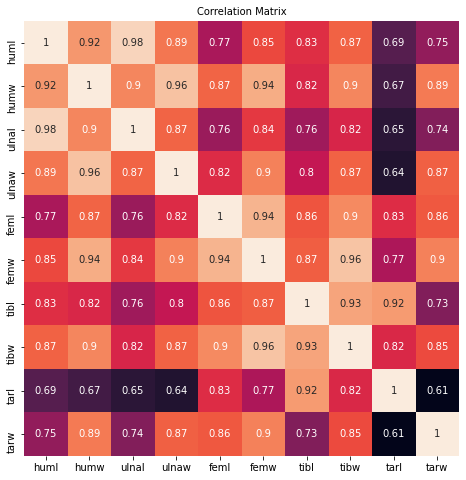

In [15]:
# list of all the columns that can be used for training. Also called as independent variables or features
feature_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

corr = df[feature_columns].corr()

_, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    corr, 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 10}
)

_ = ax.set_title("Correlation Matrix", fontsize=10)

These characteristics are closely connected. The matrix shows that as the length increases, the width also increases, and as the length falls, the width also reduces. Since all of the features in this dataset are highly linked, all 10 feature columns can be used to train the model.

Box plots of the bone sizes of each bird species is given below. 

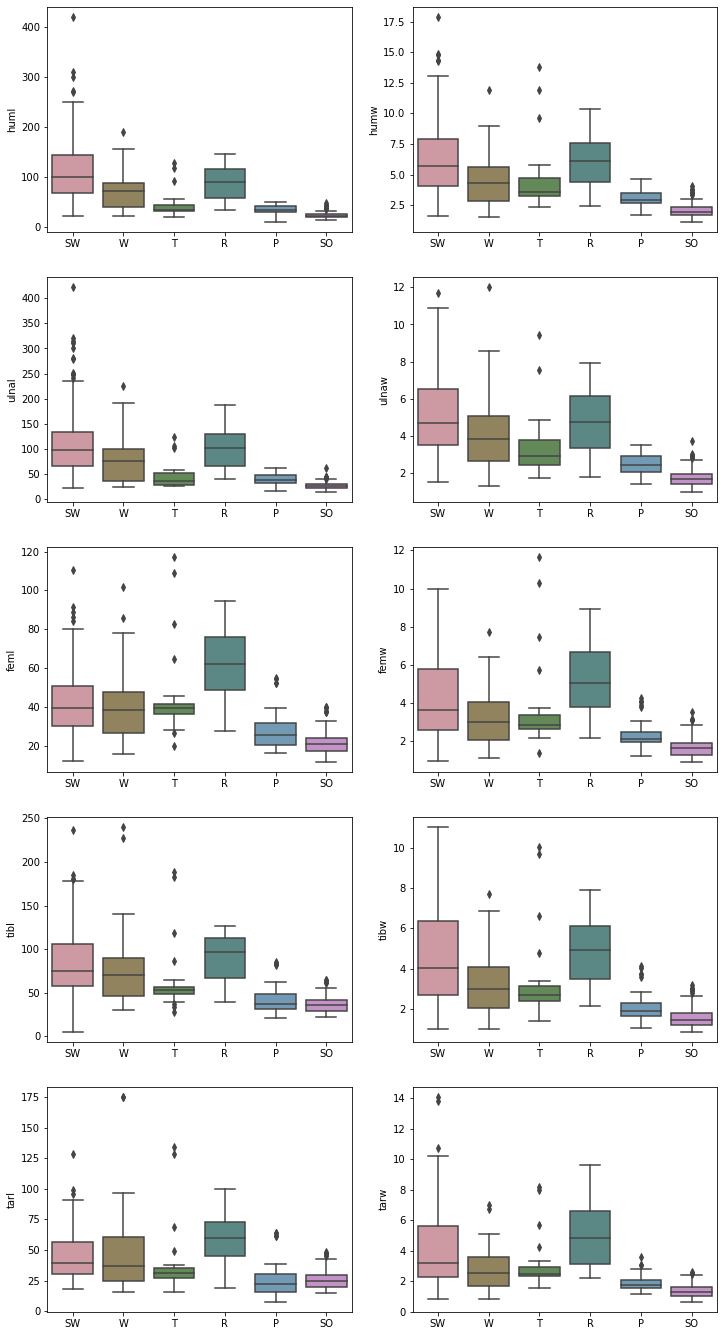

In [16]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 24))

for f, ax in zip(feature_columns, axes.ravel()):
    _ = sns.boxplot(
        data=df, 
        y=f, 
        x='type', 
        ax=ax, 
        palette=sns.color_palette("husl", n_colors=6, desat=.5)
    )
    
    ax.set_xlabel("")

We can study a lot of data regarding the bone architecture of various bird species using the aforementioned box plots. The raptors and swimming birds are larger in size. Larger and more frequently found on the water are swimming birds like ducks, swans, and cormorants. Raptors, also referred to as birds of prey, are scavengers and carnivores. They come in larger sizes as well. Examples include hawks, eagles, falcons, etc. Additionally, the box plots make it clear that singing birds are the smallest in size. The Nightingale, Canary, Mockingbird, and other birds sing.

# Data Pre-processing 

# Scaling the data

Numerical training features should be scaled to a standard range to improve the performance of machine learning algorithms. There are various scaling techniques. We shall employ the Standard Scaler because it is the industry standard for handling data scaling. Each input variable is scaled during standardisation by dividing by the standard deviation and subtracting the mean. Then, using the transform method, the mean and standard deviation are stored for use on subsequent data. When scaling new data for model testing, the standard scaler performs effectively. For using a regular scaler, I'll be using the Scikit Learn library.

In [17]:
from sklearn.preprocessing import StandardScaler
# initialise standard scaler object
scaler = StandardScaler()
# fit method compute the mean and std to be used for later scaling
scaler.fit(df[feature_columns])

StandardScaler()

In [18]:
# transforms the data by centering and scaling
scaled_features = scaler.transform(df[feature_columns])

In [19]:
# create a dataframe with new transformed features
df_feat = pd.DataFrame(scaled_features,columns=feature_columns)
df_feat.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0.301184,0.811586,0.052544,0.590009,0.249349,0.238125,-1.567195,0.409081,-0.022140,0.418045
1,0.452537,0.794030,0.198077,0.915789,0.512011,0.535295,0.414103,0.640279,0.098905,0.496000
2,0.286104,0.702742,0.005570,0.773547,0.312629,0.337182,0.284968,0.413897,-0.039000,0.188764
3,0.242914,0.467500,-0.054215,0.539536,0.160456,0.148974,0.121097,0.105633,-0.148373,0.220863
4,-0.033543,0.165547,-0.287717,0.062337,-0.145397,-0.247252,-0.220963,-0.106298,-0.316971,0.092466


# Train Test Split

The method of creating a train set and a test set involves dividing the dataset into two pieces. It is usual practise in the industry to divide the dataset into 80% train and 20% test, but it also heavily depends on the data that is available and the specifications of the issue that we are attempting to address. The train set is the set on which the model was trained and is used to fit the model. After the model has been trained, it is evaluated using the test set. Due to the smaller size of our dataset, I will use 80% of it for training and 20% for testing the model. I'll be utilising Scikit Learn's Train Test Split technique.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['type'], test_size=0.20, random_state=101)

# Model Training

The train set can be used to train the model after the data has been pre-processed and transformed into train test sets. The method transfers the attributes, or independent variables, to the output dependent variable in this stage. There are numerous algorithms included in Scikit Learn that can be used to train the models. Before selecting the best model, it is usually a good idea to train several of them and evaluate their performance. Additionally, I'll be practising with various algorithms.

For this dataset, I'll be utilising Support Vector classifier, Random Forests, and Decision Trees. They are all effective multiclass classification algorithms. With the help of these techniques, I will first build some baseline models. Select the one with the best accuracy, and then fine-tune it for improved performance.

## Decision Trees

Decision Tree is a supervised learning algorithm that uses a set of rules to make decisions. 

In [21]:
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# initialise the classifier object
dtree = DecisionTreeClassifier()
# train the classifier with training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
dtree.classes_

array(['P', 'R', 'SO', 'SW', 'T', 'W'], dtype=object)

Now the model is trained, it can be used for prediction and evaluating the model.

In [23]:
# using the predict method on test set
predictions = dtree.predict(X_test)

# Model Evaluation

The model must then be evaluated on the test set that was divided using the train-test-split procedure once it has been trained. This stage is necessary to determine how the model will function with hypothetical data.

Importing the confusion matrix and classification report will help us evaluate the models.

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion Matrix

When assessing the performance of a classification model, a N x N matrix is employed, where N is the total number of target classes. The actual goal values are contrasted with those that the machine learning model anticipated.

In [25]:
# confusion matrix method takes in the actual tests label and predicted labels as parametres
print(confusion_matrix(y_test,predictions))

[[ 4  0  0  0  2  1]
 [ 0  7  1  0  0  0]
 [ 1  0 26  0  0  0]
 [ 0  2  1 15  0  3]
 [ 0  1  0  0  2  2]
 [ 1  0  1  6  1  7]]


# Classification Report

The primary classification parameters, including precision, recall, f1-score for each class, and overall accuracy, are displayed in the classification report.

In [26]:
# method takes in the actual test labels and predicted labels as parametres
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           P       0.67      0.57      0.62         7
           R       0.70      0.88      0.78         8
          SO       0.90      0.96      0.93        27
          SW       0.71      0.71      0.71        21
           T       0.40      0.40      0.40         5
           W       0.54      0.44      0.48        16

    accuracy                           0.73        84
   macro avg       0.65      0.66      0.65        84
weighted avg       0.72      0.73      0.72        84



# Random Forests

A collection of decision trees make form the ensemble algorithm known as Random Forests. The forecast of the Random Forests method is taken to be the average of all decision tree predictions.

In [27]:
# import the classifier form the sklearn
from sklearn.ensemble import RandomForestClassifier
# initalise the classifier
rfc = RandomForestClassifier(random_state=0)
# train the classifier with training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
# using predict method on test set
rfc_pred = rfc.predict(X_test)

In [29]:
# confusion matrix method takes in the actual tests label and predicted labels as parametres
print(confusion_matrix(y_test,rfc_pred))

[[ 5  0  2  0  0  0]
 [ 1  7  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  1  1 18  0  1]
 [ 0  1  0  2  2  0]
 [ 2  0  3  4  0  7]]


In [30]:
# method takes in the actual test labels and predicted labels as parametres
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           P       0.62      0.71      0.67         7
           R       0.78      0.88      0.82         8
          SO       0.82      1.00      0.90        27
          SW       0.75      0.86      0.80        21
           T       1.00      0.40      0.57         5
           W       0.88      0.44      0.58        16

    accuracy                           0.79        84
   macro avg       0.81      0.71      0.72        84
weighted avg       0.80      0.79      0.77        84



# Support Vector Classifer

In [31]:
from sklearn.svm import LinearSVC
svc = LinearSVC(multi_class='crammer_singer', random_state=0)
svc.fit(X_train, y_train)

LinearSVC(multi_class='crammer_singer', random_state=0)

In [32]:
svc_pred = svc.predict(X_test)

In [33]:
print(confusion_matrix(y_test,svc_pred))

[[ 3  0  4  0  0  0]
 [ 1  6  0  1  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  1 19  0  1]
 [ 0  2  0  0  3  0]
 [ 1  1  4  3  0  7]]


In [34]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           P       0.60      0.43      0.50         7
           R       0.67      0.75      0.71         8
          SO       0.75      1.00      0.86        27
          SW       0.83      0.90      0.86        21
           T       1.00      0.60      0.75         5
           W       0.88      0.44      0.58        16

    accuracy                           0.77        84
   macro avg       0.79      0.69      0.71        84
weighted avg       0.79      0.77      0.76        84



It is clear from the findings of the three models discussed above that Random Forests provides the highest degree of accuracy. To further enhance the performance of this model, I will tune its parameters.

# Hyperparameter optimization

The model's hyperparameter is a setting made before the training process begins. Hyperparameters vary depending on the model. Scikit Learn has established default values for these, but we can also alter them to improve the model. I will be concentrating on the Random Forests classifier's parameters as I have selected it as the primary model. The description of the parameters I will be optimising is provided below.

* n_estimators: This is the number of trees in the forest model. Default value in the latest version of scikit learn is 100.
* max_depth: It specifies the maximum of depth of each tree. Default value is none.
* min_samples_split: It specifies the minimum number of samples required to split an internal leaf node. The default is 2.
* min_samples_leaf: It specifies the minimum number of samples required to be at a leaf node. The default value is 1.

# Grid search

The grid search approach considers a large number of hyperparameters and combines them. Additionally, you can choose how much cross validation to use. This is a great method for determining the ideal parameters. The names of the parameters serve as keys in a dictionary, and lists representing the various values are used to set the parameters. The grid search method accepts three arguments: the model, the parameter set, and the quantity of cross validations.


In [35]:
# import the grid search method
from sklearn.model_selection import GridSearchCV

# set the parameters 
params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}
# grid search estimator takes in the model estimator and parameter set
rfc_grid = GridSearchCV(rfc, param_grid=params, cv=3, refit=True, verbose=2)

The Grid search fit approach trains the data on every set of our provided parameter combinations. It determines the ideal mixture and performs fit once more to create a model.


In [36]:
rfc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_sa

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total tim

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total tim

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

The best combination of parameters can be found using best params_attribute

In [37]:
rfc_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

The best estimator can be found using the best_estimator_attribute

In [38]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=0)

In the same way as other model estimators, this grid object also contains a predict method. On the basis of the test data, it will be utilised to obtain predictions.


In [39]:
rfc_grid_pred = rfc_grid.predict(X_test)

# Evaluation 

Using the predictions from the grid estimator, confusion matrix and classification report will be printed below

In [40]:
print(confusion_matrix(y_test,rfc_grid_pred))

[[ 5  0  2  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  1  1 18  0  1]
 [ 0  1  0  2  2  0]
 [ 1  0  3  3  0  9]]


The above-mentioned confusion matrix is overly simplistic, making it challenging to draw any conclusions from it. To better comprehend it, let's make a confusion matrix graphic using the seaborn heatmap and the target labels.


In [41]:
# list of target classes from the estimator
rfc_grid.classes_

array(['P', 'R', 'SO', 'SW', 'T', 'W'], dtype=object)

Text(0.5, 15.0, 'Predicted label')

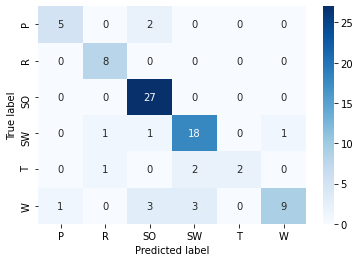

In [42]:
# create a variable of the confusion matrix method
con_mat = confusion_matrix(y_test,rfc_grid_pred)
# list of target classes
categories = rfc_grid.classes_
# set the size of plot
plt.figure(figsize=(6,4))
# heatmap function from seaborn
sns.heatmap(con_mat, annot=True, xticklabels=categories,yticklabels=categories, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
print(classification_report(y_test,rfc_grid_pred))

              precision    recall  f1-score   support

           P       0.83      0.71      0.77         7
           R       0.80      1.00      0.89         8
          SO       0.82      1.00      0.90        27
          SW       0.78      0.86      0.82        21
           T       1.00      0.40      0.57         5
           W       0.90      0.56      0.69        16

    accuracy                           0.82        84
   macro avg       0.86      0.76      0.77        84
weighted avg       0.84      0.82      0.81        84



The Wading bird class has great precision. Every time the model predicts a wading bird, it is accurate. But there is little recall. This is due to the fact that they share a bone structure with singing and swimming birds. You can see from the above correlation matrix that it correctly predicted both of these classes three times each. Raptors have excellent precision and memory. They are simpler to distinguish because of their robust, widely spread wings. Because they vary from other birds in appearance, singing birds show high levels of precision and memory. They all resemble one another greatly and have tiny bone structures. Swimming birds and terrestrial birds have similar appearances. The recall is very low because the model consistently predicted terrestrial birds as well as aquatic birds. Additionally, there are not enough samples to draw any meaningful conclusions. 

As you can see, employing the Grid Search approach has improved accuracy. More data is needed for a further rise, or perhaps better feature engineering will increase accuracy. More domain expertise would also be beneficial for better feature engineering.
